<CENTER><img src="opendata-top-transblack.png" style="width:60%"></CENTER>

<CENTER><h1>Simple ATLAS OpenData HEP analysis C++ notebook example</h1></CENTER>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TChain *dataset = new TChain("mini");

In [3]:
//dataset->Add("mc_105986.ZZ.root");

//This input is readed directly from the Internet. If you are ofline, you can use the line above
dataset->Add("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root");

In [4]:
const int vs = 5;

Int_t   lepton_n = -1,
        lepton_charge[vs], 
        lepton_type[vs];

Float_t lepton_pt[vs],
        lepton_eta[vs],
        lepton_phi[vs];

In [5]:
dataset->SetBranchAddress("lep_n",      &lepton_n);
dataset->SetBranchAddress("lep_charge", &lepton_charge);
dataset->SetBranchAddress("lep_type",   &lepton_type);
dataset->SetBranchAddress("lep_pt",     &lepton_pt);
dataset->SetBranchAddress("lep_eta",    &lepton_eta);
dataset->SetBranchAddress("lep_phi",    &lepton_phi);

In [6]:
TH1F *h_lep_pt_leptons = new TH1F("h_lep_pt_leptons","Lepton pt in GeV",20,0,200);
h_lep_pt_leptons->SetFillColor(kRed);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)dataset->GetEntries();

In [8]:
// IMPORTANT: fraction events we want to run
fraction_events = 1;
events_to_run = nentries*fraction_events;

std::cout << "Total # events = "  << nentries
          << ". Events to run = " << events_to_run
          << " corresponding to " << fraction_events*100
          << "% of total events!" << std::endl;

Total # events = 7500000. Events to run = 7500000 corresponding to 100% of total events!


In [9]:
for (i=0; i<events_to_run; i++)
{
    nbytes = dataset->GetEntry(i);
    
    if(lepton_n>1) // Number of leptons in the events has to be at least 2
    {
        if(lepton_type[0] == lepton_type[1]) //Leptons of the same family, i.e. 2 electrons or 2 muons (those are the two most energetic leptons)
        {
            if(lepton_charge[0] != lepton_charge[1]) // The two selected leptons must have opposite charge
            {
                //PT
                float lepton_pt_inGeV = lepton_pt[0]/1000.; // The default value in the root file is in MeV, so, we divide by 1000 to get it in GeV
                h_lep_pt_leptons->Fill(lepton_pt_inGeV);
            }
        }
    }
}

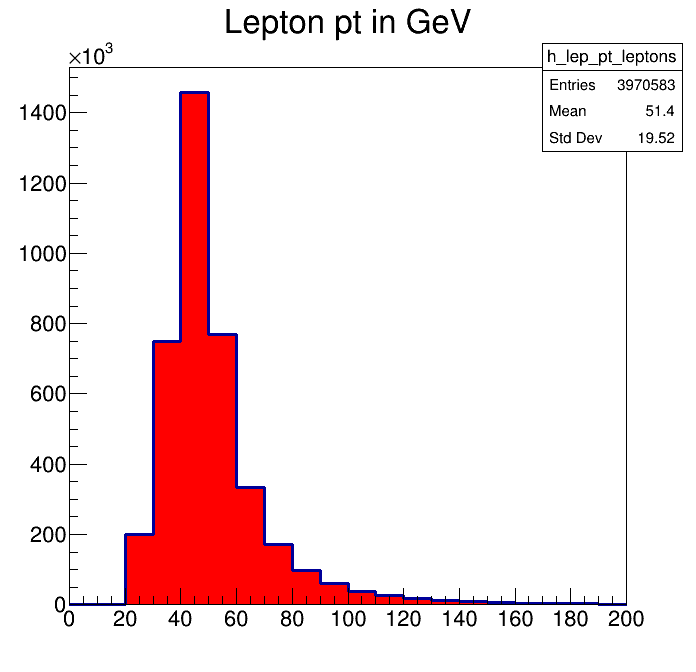

In [10]:
TCanvas *cz = new TCanvas("cz","cz",10,10,700,700);
h_lep_pt_leptons->Draw();
cz->Draw();